# Homework 10
- Min Je (John) Kim

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

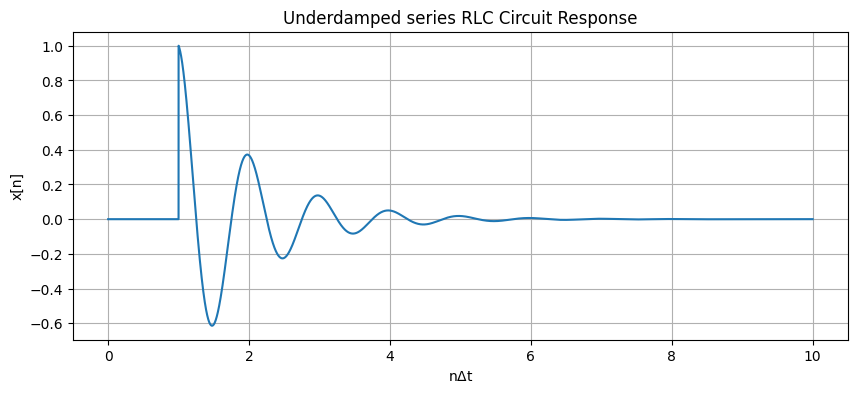

In [45]:
# Problem 2 Part A
A = 1
a = 1
t0 = 1
w = 2 * np.pi
T = 10
SamplingRate = 2000

t = np.linspace(0, T, T * SamplingRate)
x1 = A * np.exp(-a * (t - t0)) * np.cos(w * (t - t0)) * np.heaviside(t - t0, 1)

plt.figure(figsize=(10, 4))
plt.plot(t, x1)
plt.title('Underdamped series RLC Circuit Response')
plt.xlabel('n$\u0394$t')
plt.ylabel('x[n]')
plt.grid()
plt.show()


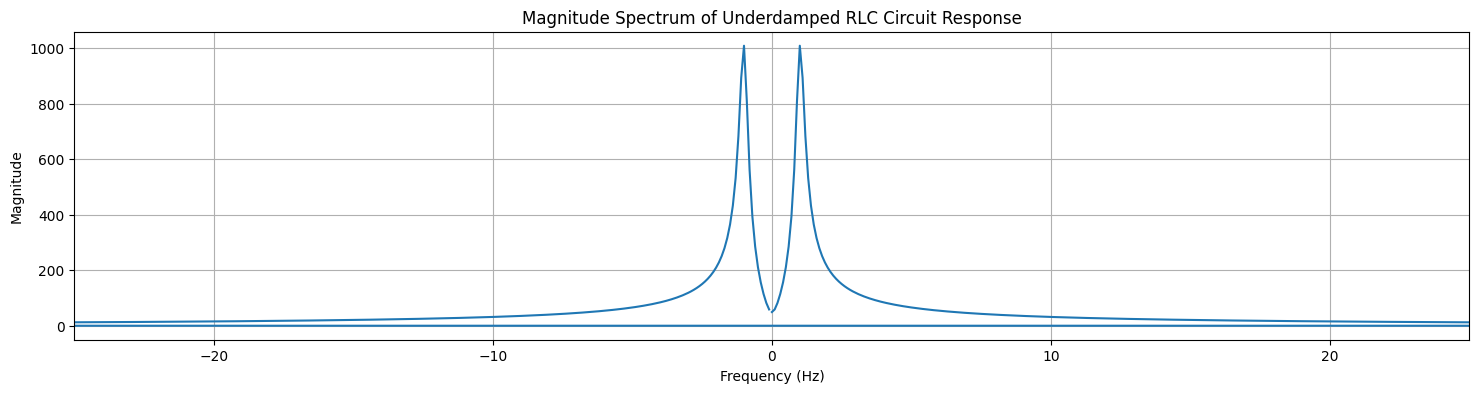

In [46]:
# Problem 2 Part B

fft_x1 = fft.fft(x1)
frequencies = fft.fftfreq(len(t), d=1/SamplingRate)
magnitude = np.abs(fft_x1)

plt.figure(figsize=(18, 4))
plt.plot(frequencies, magnitude)
plt.xlim(-25, 25)
plt.title('Magnitude Spectrum of Underdamped RLC Circuit Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

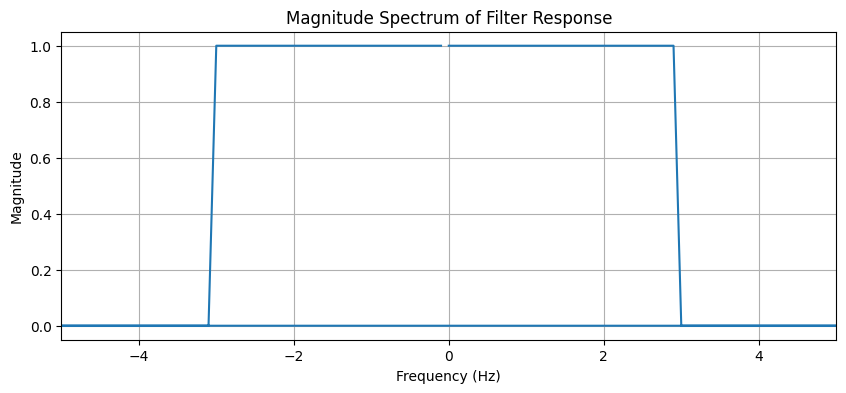

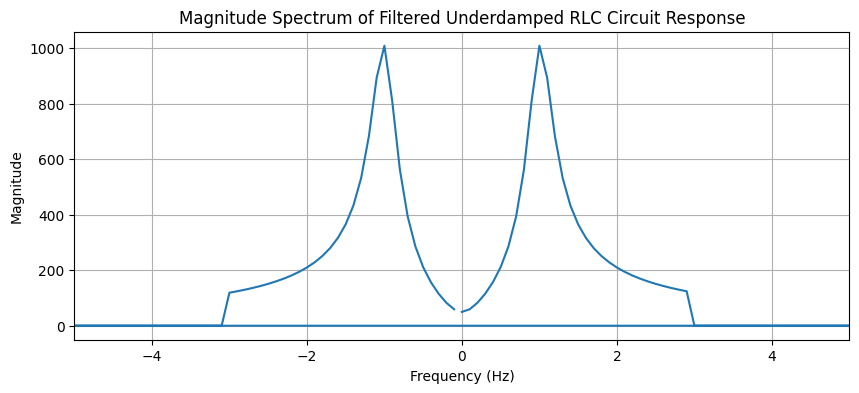

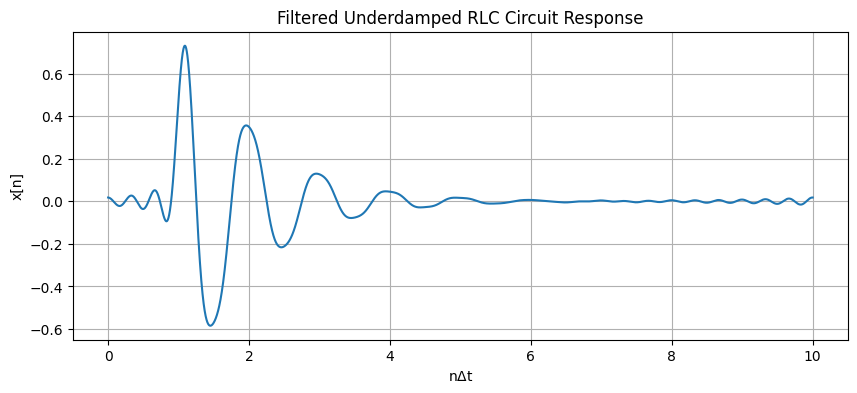

In [47]:
# Problem 2 Part C
cutoffFreq = 3
H = np.heaviside(frequencies + cutoffFreq, 1) - np.heaviside(frequencies - cutoffFreq, 1)
plt.figure(figsize=(10, 4))
plt.plot(frequencies, H)
plt.xlim(-5, 5)
plt.title('Magnitude Spectrum of Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


filtered_fft_x1 = fft_x1 * H
filtered_magnitude = np.abs(filtered_fft_x1)
plt.figure(figsize=(10, 4))
plt.plot(frequencies, filtered_magnitude)
plt.xlim(-5, 5)
plt.title('Magnitude Spectrum of Filtered Underdamped RLC Circuit Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

filtered_x1 = fft.ifft(filtered_fft_x1)
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_x1.real)
plt.title('Filtered Underdamped RLC Circuit Response')
plt.xlabel('n$\u0394$t')
plt.ylabel('x[n]')
plt.grid()
plt.show()

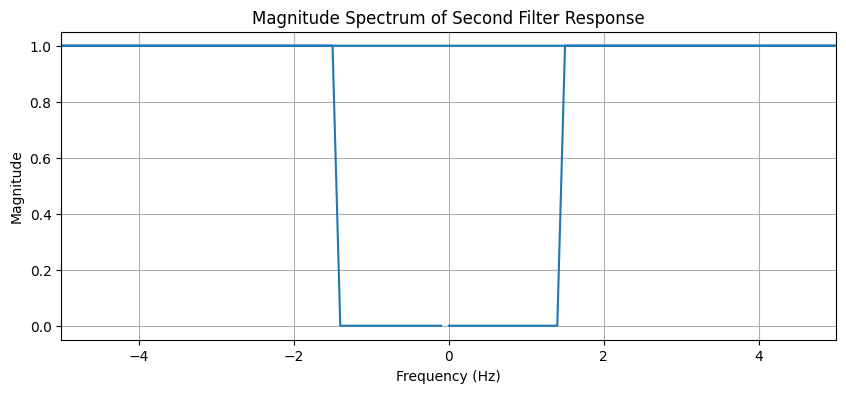

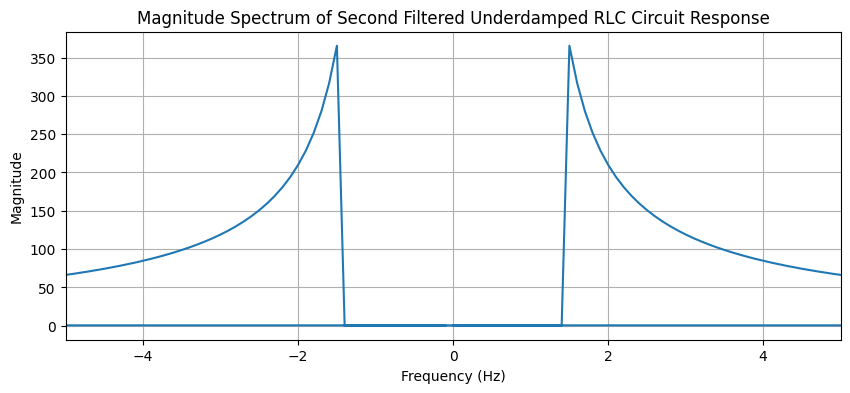

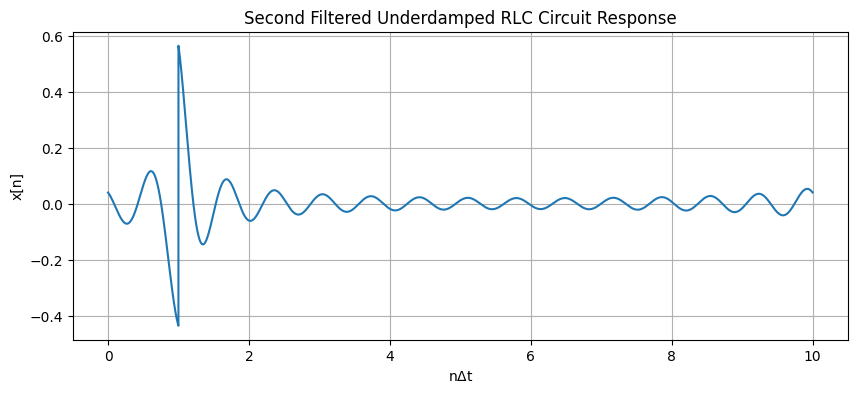

In [48]:
# Problem 2 Part D
cutoffFreq2 = 1.5
H2 = np.heaviside(0 - frequencies - cutoffFreq2, 1) + np.heaviside(frequencies - cutoffFreq2, 1)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, H2)
plt.xlim(-5, 5)
plt.title('Magnitude Spectrum of Second Filter Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

filtered_fft_x1_2 = fft_x1 * H2
filtered_magnitude_2 = np.abs(filtered_fft_x1_2)
plt.figure(figsize=(10, 4))
plt.plot(frequencies, filtered_magnitude_2)
plt.xlim(-5, 5)
plt.title('Magnitude Spectrum of Second Filtered Underdamped RLC Circuit Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

filtered_x1_2 = fft.ifft(filtered_fft_x1_2)
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_x1_2.real)
plt.title('Second Filtered Underdamped RLC Circuit Response')
plt.xlabel('n$\u0394$t')
plt.ylabel('x[n]')
plt.grid()
plt.show()


In [49]:
# Problem 2 Part E
energy = np.sum(np.abs(filtered_fft_x1)**2) / SamplingRate
print(f'Band-limited Input Energy: {energy}')

Band-limited Input Energy: 4761.999852106243
